In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()



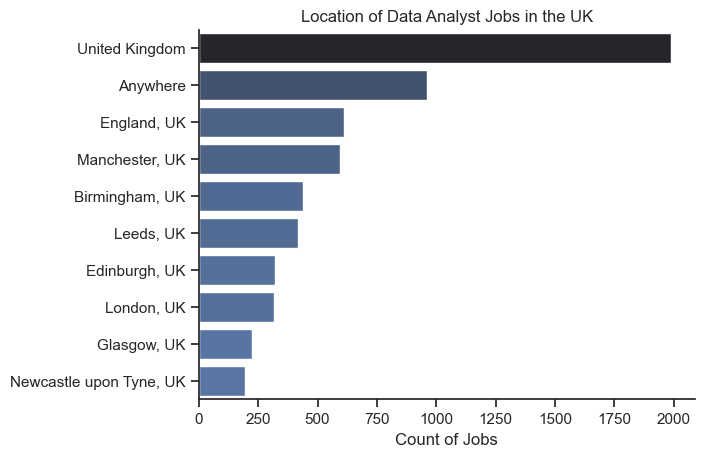

In [4]:
df_plot = df_da_uk['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Location of Data Analyst Jobs in the UK')
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.show()


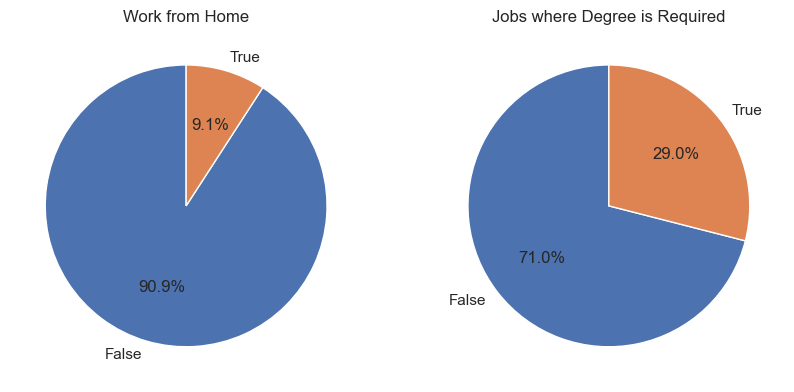

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

dict_column = { 
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Jobs where Degree is Required',
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_uk[column].value_counts(), startangle=90, autopct='%1.1f%%', labels= ['False', 'True'])
    ax[i].set_title(title)

plt.show()

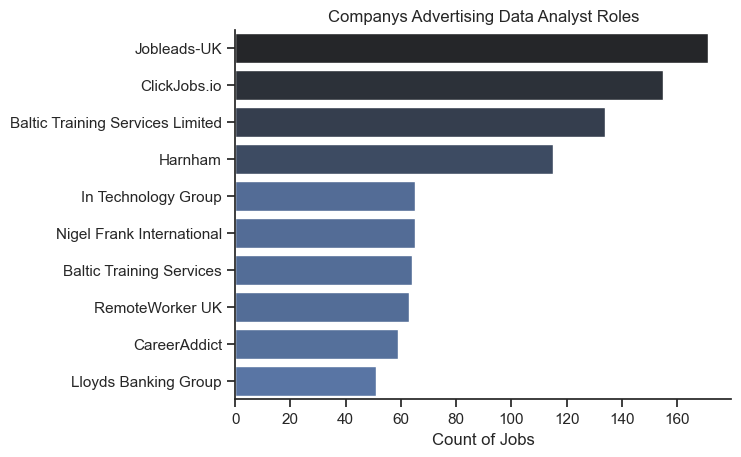

In [7]:
df_plot = df_da_uk['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Companys Advertising Data Analyst Roles')
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.show()